## Trabalho: Definição de Dataset, Limpeza e Análise dos Dados

**Aluno: Fabio Kishino**

### Descrição do dataset

O dataset escolhido para o presente trabalho é referente ao [portal da transparência do estado do Paraná](https://www.transparencia.pr.gov.br/pte/pessoal/servidores/poderexecutivo/remuneracao?windowId=fa9) e ele possui informações sobre remuneração, cargo e local de trabalho dos servidores civis e militares - Ativos, Aposentados, da Reserva e Reformados, Pensionistas e beneficiários de Pensões Especiais, e de ex-Servidores - do Poder Executivo do Estado do Paraná, estão aqui. A publicação atende as normas que tratam da transparência da Administração Pública: [Lei Federal 12.527/2011](http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm), [Lei Estadual 16.595/2010](http://www.legislacao.pr.gov.br/legislacao/pesquisarAto.do?action=exibir&codAto=56502&indice=1&totalRegistros=1) e [Decreto Estadual 10.285/2014](http://www.legislacao.pr.gov.br/legislacao/pesquisarAto.do?action=exibir&codAto=114209&indice=1&totalRegistros=1).


Ele possui um total de 871713 registros e contém as seguintes colunas: cod_vinculo, nome, sigla, instituicao, lotacao, municipio, cargo, dt_inicio, dt_fim, regime, quadro_funcional, quadro_funcional_desc, tipo_cargo, situacao, ult_remu_bruta, genero, ano_nasc e atualizado.

### Perguntas iniciais

1. Quais são os cargos mais frequentes dos servidores ativos no Paraná?
2. Qual a média salarial para cada um dos 5 municípios do estado do Paraná que possuem maior concentração de servidores públicos?
3. Qual a diferença da média salarial entre homens e mulheres em Curitiba?
4. Quais são os cargos que mais recebem e quais são os que menos recebem?
5. Dos cargos que mais recebem, qual a idade média desses servidores?
6. Qual a distribuição da idade dos servidores por gênero?


## Limpeza do dataset

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TB_RH.csv', sep=';')
df.columns = df.columns.str.upper()

df.head()

,COD_VINCULO,NOME,SIGLA,INSTITUICAO,LOTACAO,MUNICIPIO,CARGO,DT_INICIO,DT_FIM,REGIME,QUADRO_FUNCIONAL,QUADRO_FUNCIONAL_DESC,TIPO_CARGO,SITUACAO,ULT_REMU_BRUTA,GENERO,ANO_NASC,ATUALIZADO
0,285734,VIVIAN THES,SEED,SECRETARIA DA EDUCAÇÃO,E E DJALMA JOHNSSON - E FUND,CURITIBA,PROFESSOR,2012-02-01,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,9178.01,F,1977.0,2025-07-01
1,243425,VIVIAN XAVIER,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST PROF JOSE G DO AMARAL,PONTA GROSSA,PROFESSOR,2012-04-02,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,9626.30,F,1976.0,2025-07-01
2,599094,VIVIAN XAVIER BUENO,SEJU,"SECRETARIA DA JUSTIÇA, TRABALHO E DIREITOS HUM...",DEPARTAMENTO DO TRABALHO - DT,CURITIBA,PROFISSIONAL DE NÍVEL MÉDIO,2018-02-20,2018-12-31,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,DESLIGADO,0.00,F,1983.0,2019-01-01
3,112011,VIVIAN ZUQUINALI FELIX,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST GUARANI ESTRAT - 1 GR,NOVA LARANJEIRAS,DOCENTE POR PRAZO DETERMINADO,2012-02-01,2013-12-31,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,DESLIGADO,0.00,F,1980.0,2016-07-27
4,446430,VIVIAN ZUQUINALI FELIX,SEED,SECRETARIA DA EDUCAÇÃO,E E IRACI SALETE STROZAKI E F,RIO BONITO DO IGUACU,DOCENTE POR PRAZO DETERMINADO,2014-02-03,2014-12-31,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,DESLIGADO,0.00,F,1980.0,2016-07-27


In [95]:
# Renomeando o nome das colunas para facilitar interpretação
df = df.rename(columns={
  'DT_INICIO': 'DATA_INICIO',
  'DT_FIM': 'DATA_FIM',
  'ULT_REMU_BRUTA': 'ULTIMA_REMUNERACAO_BRUTA',
  'ANO_NASC': 'ANO_NASCIMENTO',
})

# Filtrar o dataset para incluir apenas servidores em situação ATIVO
pd.unique(df['SITUACAO'])
df_ativos = df[df['SITUACAO'] == 'ATIVO']

df_ativos


,COD_VINCULO,NOME,SIGLA,INSTITUICAO,LOTACAO,MUNICIPIO,CARGO,DATA_INICIO,DATA_FIM,REGIME,QUADRO_FUNCIONAL,QUADRO_FUNCIONAL_DESC,TIPO_CARGO,SITUACAO,ULTIMA_REMUNERACAO_BRUTA,GENERO,ANO_NASCIMENTO,ATUALIZADO
0,285734,VIVIAN THES,SEED,SECRETARIA DA EDUCAÇÃO,E E DJALMA JOHNSSON - E FUND,CURITIBA,PROFESSOR,2012-02-01,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,9178.01,F,1977.0,2025-07-01
1,243425,VIVIAN XAVIER,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST PROF JOSE G DO AMARAL,PONTA GROSSA,PROFESSOR,2012-04-02,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,9626.30,F,1976.0,2025-07-01
11,894417,VIVIAN ZUQUINALI FELIX,SEED,SECRETARIA DA EDUCAÇÃO,COL.EST.LUDOVICA SAFRAIDER 1/2,PORTO BARREIRO,DOCENTE POR PRAZO DETERMINADO,2025-02-03,NaN,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,ATIVO,2617.23,F,1980.0,2025-07-01
13,25997,VIVIANA ALBINO VORAKOSKI,SEED,SECRETARIA DA EDUCAÇÃO,COL EST SAGRADA FAMILIA,CAMPO LARGO,PROFESSOR,2012-04-02,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,4303.13,F,1976.0,2025-07-01
14,301536,VIVIANA ALBINO VORAKOSKI,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST JOAO XXIII,CAMPO LARGO,PROFESSOR,2012-02-01,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,8080.60,F,1976.0,2025-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871693,896687,VIVIAN ROCHA RODRIGUES,SEED,SECRETARIA DA EDUCAÇÃO,COL EST SOUZA NAVES,ROLANDIA,DOCENTE POR PRAZO DETERMINADO,2025-02-03,NaN,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,ATIVO,1416.50,F,1981.0,2025-07-01
871695,191609,VIVIAN SCHUG LOCATELLI,SEED,SECRETARIA DA EDUCAÇÃO,COL.EST.LEONILDA PAPEN,MERCEDES,PROFESSOR,2005-02-24,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,4984.64,F,1975.0,2025-07-01
871699,82331,VIVIAN SIMONE URBAN,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST VICTOR BUSSMANN,CAMPO DO TENENTE,PROFESSOR,2003-12-01,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,8275.48,F,1970.0,2025-07-01
871700,182652,VIVIAN SIMONE URBAN,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST VICTOR BUSSMANN,CAMPO DO TENENTE,PROFESSOR,2003-11-30,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,10900.04,F,1970.0,2025-07-01


In [96]:
# Verificando os tipos de dados
df_ativos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159785 entries, 0 to 871711
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   COD_VINCULO               159785 non-null  int64  
 1   NOME                      159785 non-null  object 
 2   SIGLA                     159785 non-null  object 
 3   INSTITUICAO               159785 non-null  object 
 4   LOTACAO                   159781 non-null  object 
 5   MUNICIPIO                 159785 non-null  object 
 6   CARGO                     159785 non-null  object 
 7   DATA_INICIO               159785 non-null  object 
 8   DATA_FIM                  0 non-null       object 
 9   REGIME                    159785 non-null  object 
 10  QUADRO_FUNCIONAL          159785 non-null  object 
 11  QUADRO_FUNCIONAL_DESC     159785 non-null  object 
 12  TIPO_CARGO                159785 non-null  object 
 13  SITUACAO                  159785 non-null  object

In [97]:
# Formatando a coluna DATA_INICIO para obter o ano de início do servidor
df_ativos.loc[:, 'ANO_INICIO'] = pd.to_datetime(df_ativos['DATA_INICIO']).dt.year

/var/folders/np/801w6bmj0d78pf0s_9hln43h0000gn/T/ipykernel_1660/3334978518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ativos.loc[:, 'ANO_INICIO'] = pd.to_datetime(df_ativos['DATA_INICIO']).dt.year


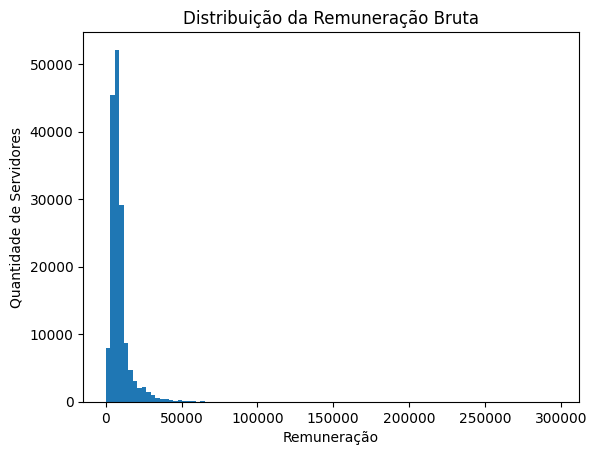

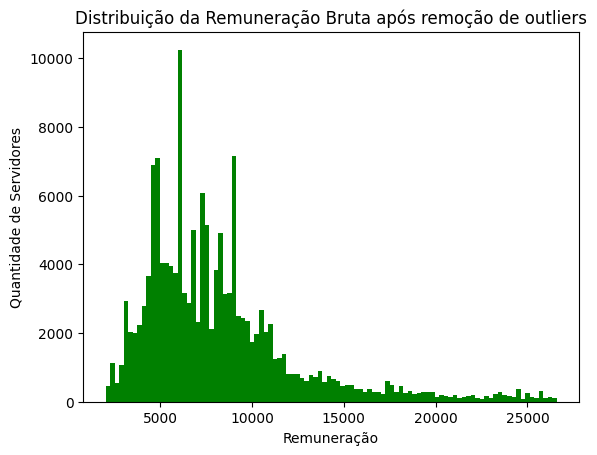

,COD_VINCULO,ULTIMA_REMUNERACAO_BRUTA,ANO_NASCIMENTO,ANO_INICIO
count,150197.000000,150197.000000,150197.000000,150197.000000
mean,469490.579452,8235.927600,1978.044615,2012.942968
std,311518.535370,4308.443833,10.811676,9.622557
min,2349.000000,2030.600000,1932.000000,1970.000000
25%,195605.000000,5255.270000,1970.000000,2006.000000
50%,402906.000000,7432.690000,1978.000000,2012.000000
75%,856703.000000,9631.790000,1986.000000,2024.000000
max,915367.000000,26592.070000,2007.000000,2025.000000


In [98]:
## Removendo outliers
# Verificando a distribuição da coluna ULTIMA_REMUNERACAO_BRUTA
df_ativos['ULTIMA_REMUNERACAO_BRUTA'].hist(bins=100, grid=False)
plt.title("Distribuição da Remuneração Bruta")
plt.xlabel("Remuneração")
plt.ylabel("Quantidade de Servidores")
plt.show()

q3 = df_ativos['ULTIMA_REMUNERACAO_BRUTA'].quantile(0.03)
q97 = df_ativos['ULTIMA_REMUNERACAO_BRUTA'].quantile(0.97)

df_ativos_filtrado = df_ativos[(df_ativos['ULTIMA_REMUNERACAO_BRUTA'] >= q3) & (df_ativos['ULTIMA_REMUNERACAO_BRUTA'] <= q97)]

df_ativos_filtrado['ULTIMA_REMUNERACAO_BRUTA'].hist(bins=100, color='green', grid=False)
plt.title("Distribuição da Remuneração Bruta após remoção de outliers")
plt.xlabel("Remuneração")
plt.ylabel("Quantidade de Servidores")
plt.show()

df_ativos_filtrado.describe()

# Análise Exploratória 📊

## 1. Quais são os cargos mais frequentes dos servidores ativos no Paraná?

In [99]:
df_ativos_filtrado.groupby('CARGO').size().sort_values(ascending=False).head(20)
# Percebe-se que existem cargos que não foram corretamente digitados (****)

# Mostrar os registros com cargos incorretos juntamente com a coluna QUADRO_FUNCIONAL_DESC
df_sem_cargos = df_ativos_filtrado[df_ativos_filtrado['CARGO'] == '****'][['CARGO', 'QUADRO_FUNCIONAL_DESC']]
df_sem_cargos['QUADRO_FUNCIONAL_DESC'].unique()




array(['POLÍCIA MILITAR', 'POLÍCIA CIVIL'], dtype=object)

In [100]:
# Percebe-se que o quadro funcional sempre corresponde à cargos da Policia Militar e Civil, mas não é possível identificar qual é o cargo exatamente e outros valores de outras colunas.
# Por isso, será necessário descarta-los.
df_ativos_filtrado = df_ativos_filtrado[df_ativos_filtrado['CARGO'] != '****'] 

df_top_cargos = df_ativos_filtrado.groupby('CARGO').size().sort_values(ascending=False).head(10)
df_top_cargos

CARGO
PROFESSOR                         48090
DOCENTE POR PRAZO DETERMINADO     28007
AGENTE EDUCACIONAL II              7313
AGENTE EDUCACIONAL I               6761
PROFESSOR DE ENSINO SUPERIOR       4486
CARGO COMISSIONADO EXECUTIVO       3712
POLICIAL PENAL                     2542
PROMOTOR DE SAUDE EXECUCAO         2524
AGENTE PROFISSIONAL                1937
PROMOTOR DE SAUDE PROFISSIONAL     1869
dtype: int64

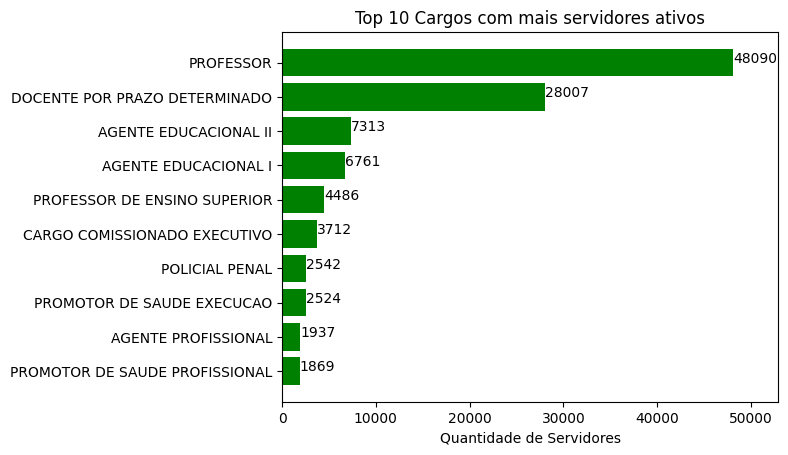

In [101]:
df_top_cargos = df_top_cargos.sort_values(ascending=True)

# Gráfico de barras horizontais para os 10 cargos com mais servidores ativos
for index, value in enumerate(df_top_cargos.values):
    plt.text(value, index, str(value))
    plt.xlim(0, df_top_cargos.values.max() * 1.1)

plt.barh(df_top_cargos.index, df_top_cargos.values, color='green')
plt.xlabel('Quantidade de Servidores')
plt.title('Top 10 Cargos com mais servidores ativos')
plt.show()

## 2. Qual a média salarial para cada um dos 5 municípios do estado do Paraná que possuem a maior concentração de servidores públicos?

Top 5 municípios com mais servidores ativos:
                  0
MUNICIPIO          
CURITIBA      24419
LONDRINA       9047
MARINGA        6175
CASCAVEL       5371
PONTA GROSSA   4620


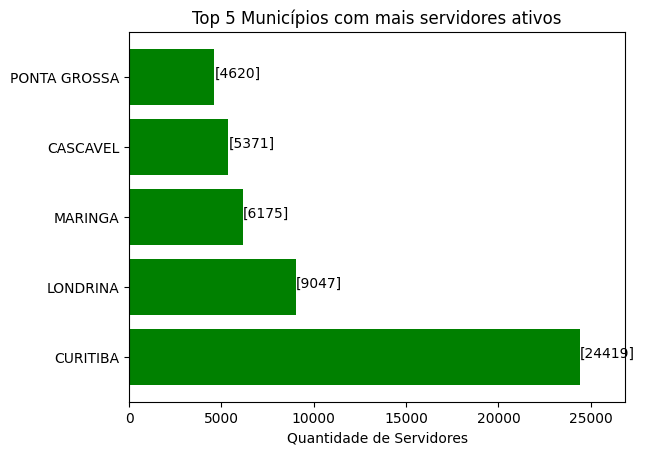

In [102]:
top_municipio = pd.DataFrame(df_ativos_filtrado.groupby('MUNICIPIO').size().sort_values(ascending=False).head(5))
print("Top 5 municípios com mais servidores ativos:")
print(top_municipio)
top_municipio.columns = ['QUANTIDADE_SERVIDORES']

for index, value in enumerate(top_municipio.values):
    plt.text(value, index, str(value))
    plt.xlim(0, top_municipio.values.max() * 1.1)

plt.barh(top_municipio.index, top_municipio['QUANTIDADE_SERVIDORES'], color='green')
plt.xlabel('Quantidade de Servidores')
plt.title('Top 5 Municípios com mais servidores ativos')
plt.show()



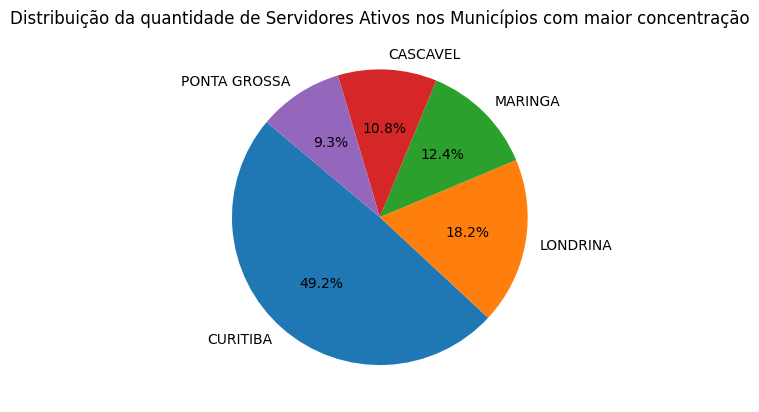

In [103]:
plt.pie(top_municipio['QUANTIDADE_SERVIDORES'], labels=top_municipio.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da quantidade de Servidores Ativos nos Municípios com maior concentração')
plt.show()

In [104]:
# Calcular a média das remunerações brutas dos servidores ativos nos município com maior concentração de servidores
top_municipio_remuneracao = pd.DataFrame(round(df_ativos_filtrado.groupby('MUNICIPIO')['ULTIMA_REMUNERACAO_BRUTA'].mean().sort_values(ascending=False),2))
print("\nMédia das remunerações dos servidores ativos por município:")
print(top_municipio_remuneracao)



Média das remunerações dos servidores ativos por município:
                         ULTIMA_REMUNERACAO_BRUTA
MUNICIPIO                                        
MARINGA                                  10923.79
LONDRINA                                  9930.13
MARECHAL CANDIDO RONDON                   9551.45
PONTA GROSSA                              9156.35
IRATI                                     8930.75
...                                           ...
MERCEDES                                  5703.79
ESPERANCA NOVA                            5684.94
DIAMANTE D OESTE                          5587.47
PORTO AMAZONAS                            5557.14
PORTO BARREIRO                            5424.04

[400 rows x 1 columns]


In [105]:
# Obter a média salarial para os 5 municípios com a maior concentração de servidores públicos
df_top_municipio_remuneracao = pd.merge(top_municipio, top_municipio_remuneracao, how='inner', on='MUNICIPIO')
df_top_municipio_remuneracao.columns = ['QUANTIDADE_SERVIDORES', 'MEDIA_REMUNERACAO_BRUTA']

display(df_top_municipio_remuneracao)

,QUANTIDADE_SERVIDORES,MEDIA_REMUNERACAO_BRUTA
MUNICIPIO,,
CURITIBA,24419,8640.16
LONDRINA,9047,9930.13
MARINGA,6175,10923.79
CASCAVEL,5371,8863.59
PONTA GROSSA,4620,9156.35


## 3. Qual a diferença da média salarial entre homens e mulheres em Curitiba?

<Axes: title={'center': 'Média Salarial de Curitiba por gênero'}, xlabel='Gênero', ylabel='Média Salarial Bruta'>

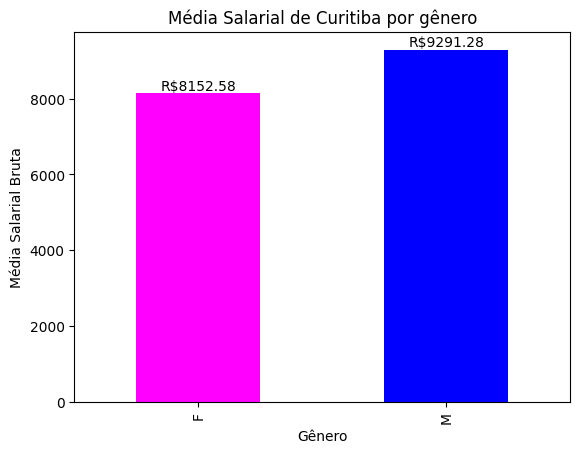

In [106]:
df_remuneracao_genero_cwb = df_ativos_filtrado[df_ativos_filtrado['MUNICIPIO'] == 'CURITIBA']

df_remuneracao_genero_cwb = df_remuneracao_genero_cwb.groupby('GENERO')['ULTIMA_REMUNERACAO_BRUTA'].mean().round(2)

# Gráfico de barras para comparar a média salarial entre homens e mulheres
for i, v in enumerate(df_remuneracao_genero_cwb.values):
  plt.text(i, v, f'R${v:.2f}', ha='center', va='bottom')
df_remuneracao_genero_cwb.plot(kind='bar', color=['magenta', 'blue'], title='Média Salarial de Curitiba por gênero', xlabel='Gênero', ylabel='Média Salarial Bruta')



## 4. Quais são os cargos que mais recebem e quais são os que menos recebem?

In [107]:
# As 5 médias salariais mais altas e seus respectivos cargos
df_cargo_remuneracao_alto = df_ativos_filtrado.groupby('CARGO')['ULTIMA_REMUNERACAO_BRUTA'].mean().round(2)
df_cargo_remuneracao_alto = df_cargo_remuneracao_alto.sort_values(ascending=False).head(5)
df_cargo_remuneracao_alto

CARGO
ANALISTA ADMINIST. PL                  26569.83
ASSESSOR DE COMUNICACAO SOCIAL         26522.00
ASSESSOR DE RELACOES INSTITUCIONAIS    26372.00
CONTROLADOR GERAL                      26372.00
COORDENADOR ADMINISTRATIVO             26372.00
Name: ULTIMA_REMUNERACAO_BRUTA, dtype: float64

In [108]:
# As 5 médias salariais mais baixas e seus respectivos cargos
df_cargo_remuneracao_baixo = df_ativos_filtrado.groupby('CARGO')['ULTIMA_REMUNERACAO_BRUTA'].mean().round(2)
df_cargo_remuneracao_baixo = df_cargo_remuneracao_baixo.sort_values(ascending=True).head(5)
df_cargo_remuneracao_baixo

CARGO
DIRETORA DE CENA                2134.88
LOCUTOR                         2329.63
FUNÇÃO ACADÊMICA DAS IEES FA    2464.66
AUXILIAR ADMINISTRATIVO         2697.83
LOCUTORA                        2761.83
Name: ULTIMA_REMUNERACAO_BRUTA, dtype: float64

## 5. Dos cargos que mais recebem, qual a idade média desses servidores?

In [109]:
from datetime import datetime

# Calcular a idade dos servidores
current_year = datetime.now().year
df_ativos_filtrado['IDADE'] = current_year - df_ativos_filtrado['ANO_NASCIMENTO']
df_ativos_filtrado.head() 


,COD_VINCULO,NOME,SIGLA,INSTITUICAO,LOTACAO,MUNICIPIO,CARGO,DATA_INICIO,DATA_FIM,REGIME,QUADRO_FUNCIONAL,QUADRO_FUNCIONAL_DESC,TIPO_CARGO,SITUACAO,ULTIMA_REMUNERACAO_BRUTA,GENERO,ANO_NASCIMENTO,ATUALIZADO,ANO_INICIO,IDADE
0,285734,VIVIAN THES,SEED,SECRETARIA DA EDUCAÇÃO,E E DJALMA JOHNSSON - E FUND,CURITIBA,PROFESSOR,2012-02-01,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,9178.01,F,1977.0,2025-07-01,2012,48.0
1,243425,VIVIAN XAVIER,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST PROF JOSE G DO AMARAL,PONTA GROSSA,PROFESSOR,2012-04-02,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,9626.30,F,1976.0,2025-07-01,2012,49.0
11,894417,VIVIAN ZUQUINALI FELIX,SEED,SECRETARIA DA EDUCAÇÃO,COL.EST.LUDOVICA SAFRAIDER 1/2,PORTO BARREIRO,DOCENTE POR PRAZO DETERMINADO,2025-02-03,NaN,TEMPORÁRIO,CRES,TEMPORÁRIOS,****,ATIVO,2617.23,F,1980.0,2025-07-01,2025,45.0
13,25997,VIVIANA ALBINO VORAKOSKI,SEED,SECRETARIA DA EDUCAÇÃO,COL EST SAGRADA FAMILIA,CAMPO LARGO,PROFESSOR,2012-04-02,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,4303.13,F,1976.0,2025-07-01,2012,49.0
14,301536,VIVIANA ALBINO VORAKOSKI,SEED,SECRETARIA DA EDUCAÇÃO,ESC EST JOAO XXIII,CAMPO LARGO,PROFESSOR,2012-02-01,NaN,ESTATUTÁRIO,QPM,MAGISTÉRIO,EFETIVO,ATIVO,8080.60,F,1976.0,2025-07-01,2012,49.0


In [110]:
df_media_idade_cargo = df_ativos_filtrado[['CARGO','IDADE']].groupby('CARGO').mean().sort_values(by='IDADE', ascending=False).astype(int)

df_media_idade_cargo_alta_remuneracao = df_media_idade_cargo.loc[df_cargo_remuneracao_alto.index]
df_media_idade_cargo_alta_remuneracao

,IDADE
CARGO,
ANALISTA ADMINIST. PL,67
ASSESSOR DE COMUNICACAO SOCIAL,81
ASSESSOR DE RELACOES INSTITUCIONAIS,85
CONTROLADOR GERAL,29
COORDENADOR ADMINISTRATIVO,54


## 6. Qual a distribuição da idade dos servidores por gênero?

Estatísticas descritivas da idade dos servidores ativos por gênero:
Masculino:
count    45317.000000
mean        47.071099
std         11.201320
min         19.000000
25%         39.000000
50%         47.000000
75%         56.000000
max         93.000000
Name: IDADE, dtype: float64
Feminino:
count    86218.000000
mean        48.293396
std         10.609076
min         18.000000
25%         41.000000
50%         49.000000
75%         56.000000
max         84.000000
Name: IDADE, dtype: float64


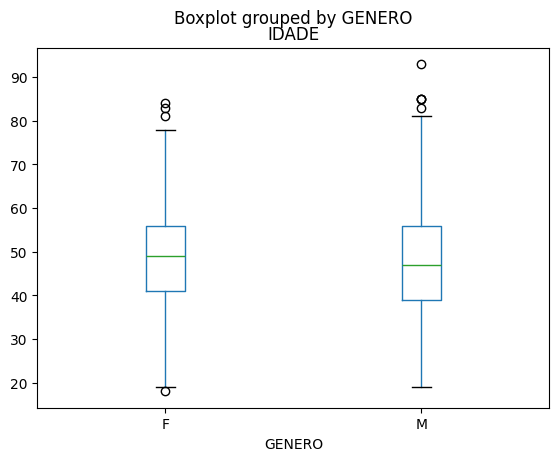

In [111]:
df_ativos_filtrado.boxplot(column='IDADE', by='GENERO', grid=False)

print("Estatísticas descritivas da idade dos servidores ativos por gênero:")
print("Masculino:")
print(df_ativos_filtrado[df_ativos_filtrado['GENERO'] == 'M']['IDADE'].describe())

print("Feminino:")
print(df_ativos_filtrado[df_ativos_filtrado['GENERO'] == 'F']['IDADE'].describe())


## Modelagem 🔨

## Regressão Linear
Objetivo: Previsão das variáveis que influenciam a Remuneração Bruta 

In [112]:
from statsmodels.formula.api import ols

df_modelo = df_ativos_filtrado.copy()

df_modelo = df_modelo[df_modelo['MUNICIPIO'] == 'CURITIBA']

modelo = ols(formula="ULTIMA_REMUNERACAO_BRUTA ~ IDADE + C(GENERO) + C(CARGO) + C(REGIME) + C(QUADRO_FUNCIONAL_DESC)", data=df_modelo)

response = modelo.fit()

print(response.summary())


                               OLS Regression Results                               
Dep. Variable:     ULTIMA_REMUNERACAO_BRUTA   R-squared:                       0.558
Model:                                  OLS   Adj. R-squared:                  0.551
Method:                       Least Squares   F-statistic:                     80.82
Date:                      Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                              17:17:42   Log-Likelihood:            -2.3006e+05
No. Observations:                     24419   AIC:                         4.609e+05
Df Residuals:                         24043   BIC:                         4.639e+05
Df Model:                               375                                         
Covariance Type:                  nonrobust                                         
                                                                                                      coef    std err          t      P>|t|      [0.02

In [113]:
novo_funcionario = pd.DataFrame({
    'IDADE': [30],
    'GENERO': ['M'],
    'CARGO': ['ANALISTA DE SISTEMAS'],
    'REGIME': ['ESTATUTÁRIO'],
    'QUADRO_FUNCIONAL_DESC': ['MAGISTÉRIO'],
})

response.predict(novo_funcionario)


0    22639.520187
dtype: float64

## Clusterização
Objetivo: encontrar grupos semelhantes utilizando idade, remuneração e município

In [114]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [115]:
df_cluster = df_ativos_filtrado.copy()

df_cluster = df_cluster[(df_cluster['MUNICIPIO'] == 'CURITIBA') & (df_cluster['REGIME'] == 'CLT')]

df_cluster = df_cluster[['IDADE', 'ULTIMA_REMUNERACAO_BRUTA', 'ANO_NASCIMENTO', 'ANO_INICIO']]

# Normalização dos dados
df_cluster_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(df_cluster), 
                  index = df_cluster.index, 
                  columns=df_cluster.columns)

print("Dados normalizados:")
print(df_cluster_norm)

Dados normalizados:
           IDADE  ULTIMA_REMUNERACAO_BRUTA  ANO_NASCIMENTO  ANO_INICIO
1562    0.384615                  0.452253        0.615385    0.872727
1563    0.323077                  0.060204        0.676923    0.690909
1598    0.384615                  0.310350        0.615385    0.654545
2024    0.600000                  0.178663        0.400000    0.654545
2258    0.461538                  0.151447        0.538462    0.727273
...          ...                       ...             ...         ...
869993  0.276923                  0.380555        0.723077    1.000000
870026  0.323077                  0.460801        0.676923    0.800000
870611  0.615385                  0.535554        0.384615    0.436364
870794  0.307692                  0.718049        0.692308    0.690909
871672  0.430769                  0.554320        0.569231    0.563636

[2486 rows x 4 columns]


O número ótimo de clusters é: 6


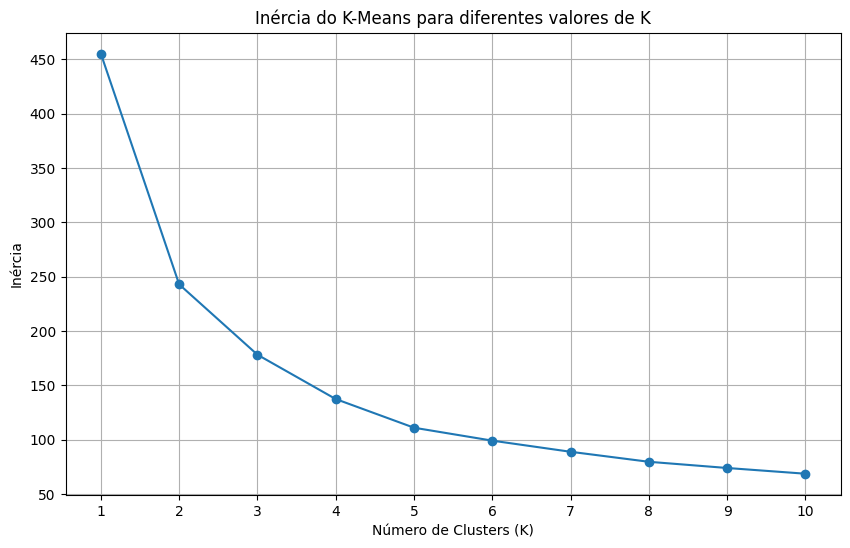

In [116]:
from math import sqrt

# Método do Cotovelo 
def calc_inertia(df):
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_cluster_norm)
        inertias.append(kmeans.inertia_)

    return inertias

inertias = calc_inertia(df_cluster_norm)

# Função para obter o melhor valor de K com base no método do cotovelo
def k_optimal(inertias):
    x1, y1 = 2, inertias[0]
    x2, y2 = 20, inertias[len(inertias)-1]

    distances = []
    for i in range(len(inertias)):
        x0 = i+2
        y0 = inertias[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

optimal_k = k_optimal(inertias)

print(f"O número ótimo de clusters é: {optimal_k}")

# Plotando o gráfico de inércia
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Inércia do K-Means para diferentes valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [117]:
# Aplicando o KMeans
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)  
kmeans.fit(df_cluster_norm) 
df_cluster['Agrupamento'] = kmeans.labels_

df_cluster['Agrupamento'].value_counts().sort_index()

Agrupamento
0    346
1    394
2    447
3    554
4    477
5    268
Name: count, dtype: int64

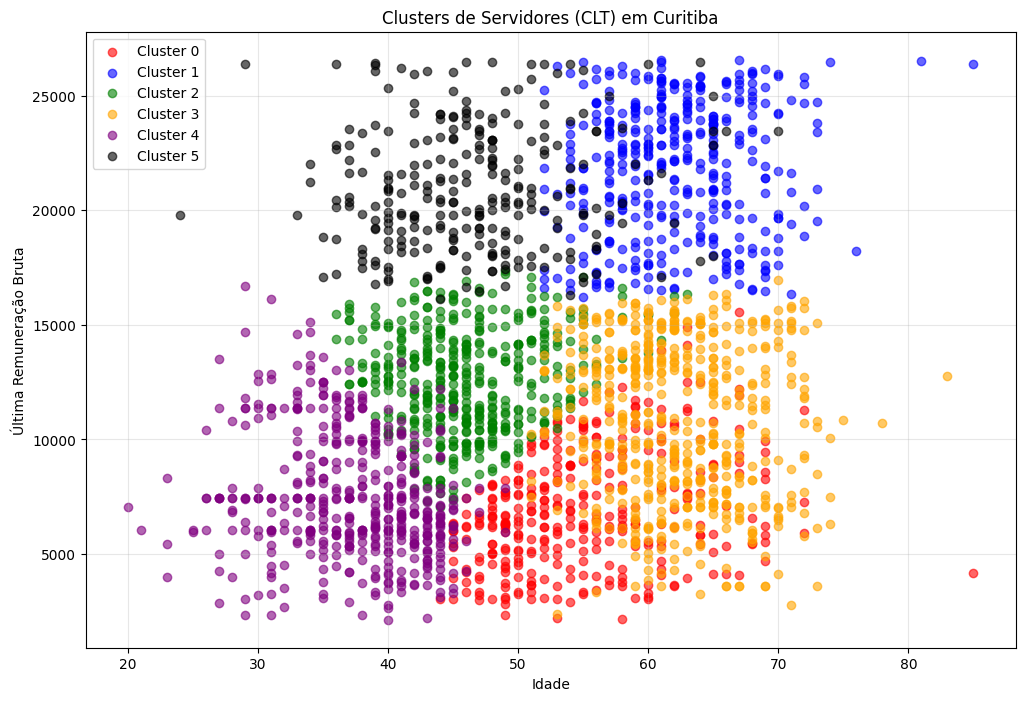

In [124]:
# Gráfico de dispersão: Idade vs Remuneração colorido por cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black']

plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    cluster_values = df_cluster[df_cluster['Agrupamento'] == i]
    plt.scatter(cluster_values['IDADE'], cluster_values['ULTIMA_REMUNERACAO_BRUTA'], c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Idade')
plt.ylabel('Última Remuneração Bruta')
plt.title('Clusters de Servidores (CLT) em Curitiba')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

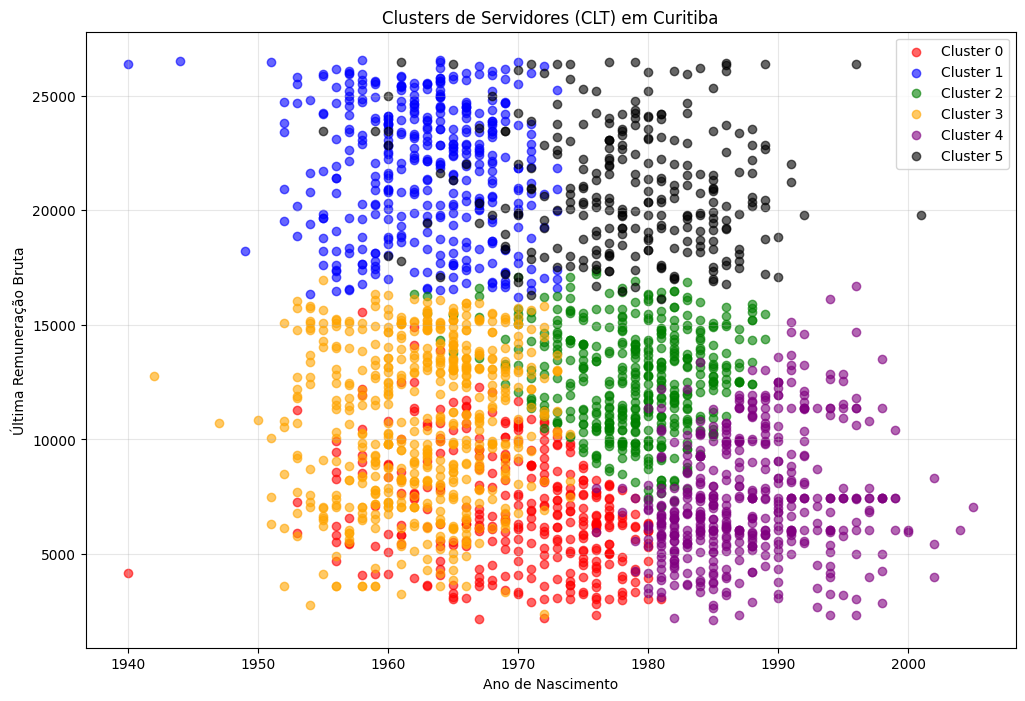

In [130]:
# Gráfico de dispersão: Idade vs Remuneração colorido por cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black']

plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    cluster_values = df_cluster[df_cluster['Agrupamento'] == i]
    plt.scatter(cluster_values['ANO_NASCIMENTO'], cluster_values['ULTIMA_REMUNERACAO_BRUTA'], c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Ano de Nascimento')
plt.ylabel('Última Remuneração Bruta')
plt.title('Clusters de Servidores (CLT) em Curitiba')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


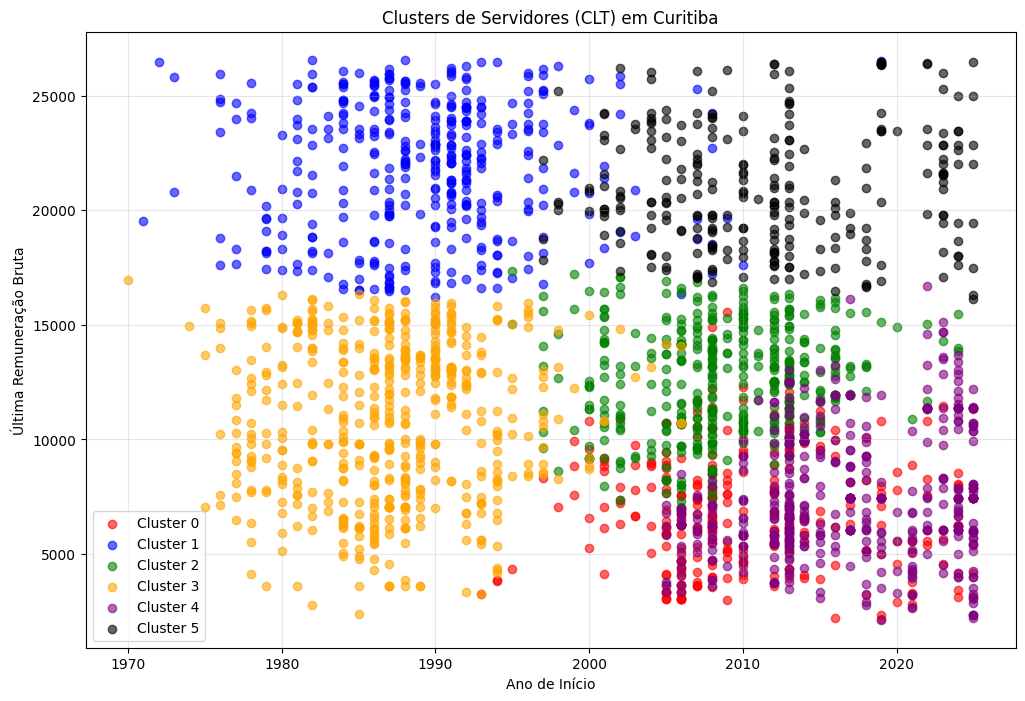

In [131]:
# Gráfico de dispersão: Idade vs Remuneração colorido por cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black']

plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    cluster_values = df_cluster[df_cluster['Agrupamento'] == i]
    plt.scatter(cluster_values['ANO_INICIO'], cluster_values['ULTIMA_REMUNERACAO_BRUTA'], c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Ano de Início')
plt.ylabel('Última Remuneração Bruta')
plt.title('Clusters de Servidores (CLT) em Curitiba')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
